In [1]:
import spectral.io.envi as envi
import spectral as spy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
from scipy import stats
from scipy.stats import lognorm
import statistics
import paramnormal
import pandas as pd
from PIL import Image


In [2]:
def percent_stretch(B):
    B[B<0] = 0
    minval = np.percentile(B, 5)
    maxval = np.percentile(B, 95)
    pixval1 = (B-minval)/(maxval-minval)
    minval = np.min(pixval1)
    maxval = np.max(pixval1)
    pixval = (pixval1-minval)/(maxval-minval)
    return pixval

number of tiles for this image is:  1


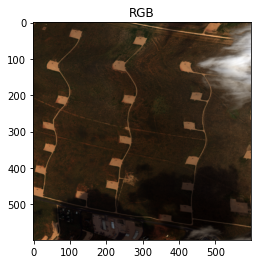

NameError: name 'os' is not defined

In [3]:
name = 'GAO20210730t175252'
rdn_file   = '/Users/ayasse/Airborn_data/CR/'+ name +'p0000_rdn_v2z1_clip' #open a file
data = envi.open(rdn_file+'.hdr', rdn_file) # extract data cuve
size = 598#size of output file

num_img_tiles = round(data.shape[0]//size)# number of tiles to make 
print('number of tiles for this image is: ',num_img_tiles)

start = 0

for i in range(0,num_img_tiles):
    start = i * size
    RGBplus = data[0:size,0:size,0:6] # create the output file
    #print(data.shape)
    RGBplus[:,:,0:1]= percent_stretch(data[0+start:size+start,0:size,59])#R
    RGBplus[:,:,1:2]= percent_stretch(data[0+start:size+start,0:size,38])#G
    RGBplus[:,:,2:3]= percent_stretch(data[0+start:size+start,0:size,16])#B

    idx447 = np.argmin(abs(np.array(data.bands.centers)- 447))# get the wvl index from rad data
    idx1246 = np.argmin(abs(np.array(data.bands.centers)- 1246))# get the wvl index from rad data
    idx1650 = np.argmin(abs(np.array(data.bands.centers)- 1650))# get the wvl index from rad data

    RGBplus[:,:,3:4]= percent_stretch(data[0+start:size+start,0:size,int(idx447)])#
    RGBplus[:,:,4:5]= percent_stretch(data[0+start:size+start,0:size,int(idx1246)])#
    RGBplus[:,:,5:6]= percent_stretch(data[0+start:size+start,0:size,int(idx1650)])#

    plt.imshow(RGBplus[:,:,0:3])
    plt.title("RGB")
    plt.show()
    
    path_exists = os.path.exists('/Users/ayasse/Documents/GitHub/spectrometer_masks/'+name+ '_'+str(i+1))
    if path_exists == True:
        matplotlib.image.imsave(name+ '_'+str(i+1)+'/RGB.png', RGBplus[:,:,0:3])
    else:
        os.mkdir('/Users/ayasse/Documents/GitHub/spectrometer_masks/'+name+ '_'+str(i+1))
        matplotlib.image.imsave(name+ '_'+str(i+1)+'/RGB.png', RGBplus[:,:,0:3])

In [38]:
matplotlib.image.imsave('test.png', RGBplus[:,:,0:3])

(512, 512, 3)


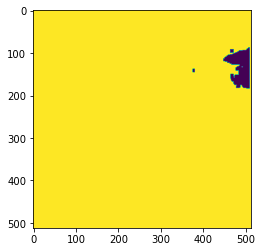

In [54]:
im_frame = Image.open('mask.png')
np_frame = np.array(im_frame)
print(np_frame.shape)
plt.imshow(np_frame[:,:,2]-np_frame[:,:,1]+ 255)
plt.show()

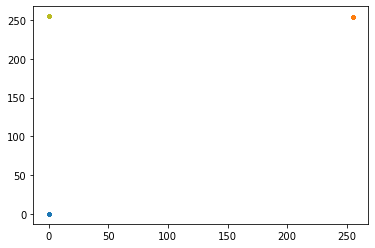